# Visualizing Zombi Simulations
Phylustrator is designed to handle complex evolutionary scenarios like those generated by **Zombi**.
We will visualize:
1. The **Species Tree** as a chronogram.
2. **Transfers** as curved links between branches.
3. **Losses and Duplications** as markers along the lineages.

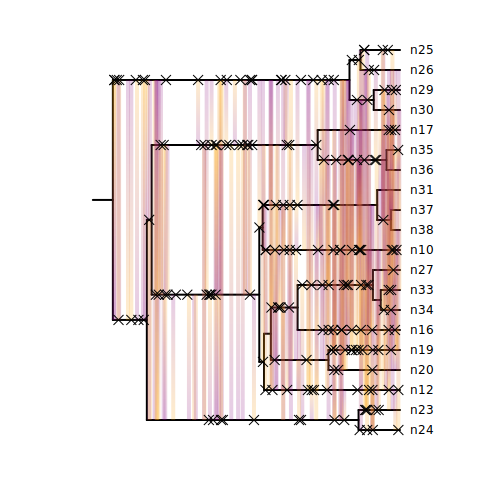

In [9]:
import phylustrator as ph
from phylustrator import ZombiData, parse_zombi 

zombi_data = parse_zombi("../examples/data/zombi/")
t = zombi_data.species_tree


# 2. Setup Style (Chronogram)
zombi_style = ph.TreeStyle(
    width=500, height=500,
    branch_color="black",
    branch_size=2,
    leaf_size=0,
    node_size=0
)

v_drawer = ph.VerticalTreeDrawer(t, style=zombi_style)

# 3. Draw Base Tree
v_drawer.draw()

# 4. Add Transfers (Curved Lines)
# 'transfers' list from parser contains {from, to, time}
v_drawer.add_transfer_links(
    zombi_data.transfers,
    gradient_colors=("purple", "orange"),
    arrows=False,
    vary_width=True,
    stroke_width=4,
    opacity_scale=0.2
)

# 5. Mark Events (D = Duplication, L = Loss)
# 'raw_events' list contains {node, time, type}
v_drawer.mark_events(
    zombi_data.raw_events, 
    type_filter="L", 
    shape="x", 
    color="black", 
    size=5
)

v_drawer.mark_events(
    zombi_data.raw_events, 
    type_filter="D", 
    shape="square", 
    color="green", 
    size=4
)

# 6. Finalize
v_drawer.add_leaf_names()
v_drawer.d